# Histograms

chart to display the distribution of values


In [3]:
# 1) import libraries & dataset
from datasets import load_dataset
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# 2) format job_posted date in datetime (it was string)
df.job_posted_date = pd.to_datetime(df.job_posted_date)

# 3) add column job posted month to convert job posted datetime
df['job_posted_month'] = df.job_posted_date.dt.month

# 4) convert 'job_skills' into list
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)


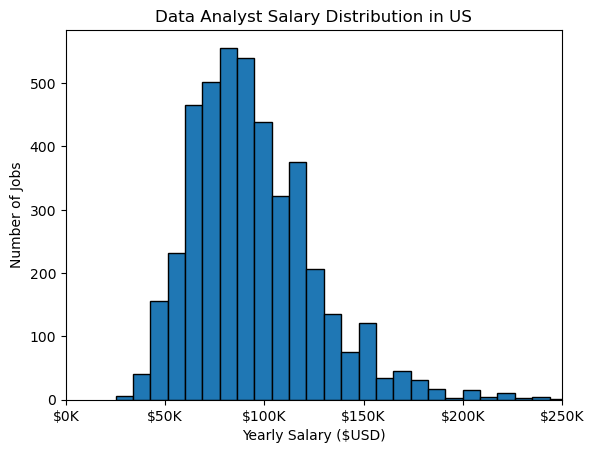

In [15]:
df_da_us = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_da_us['salary_year_avg'].plot(
    kind='hist',
    bins=40, #number of columns of the distribution, default=10
    edgecolor='black', #borders of the bins
    title='Data Analyst Salary Distribution in US',
    xlabel='Yearly Salary ($USD)',
    ylabel='Number of Jobs'
)
plt.xlim(0, 250000) #set limit to exclude outliers form the distribution
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

### Exercises

🟩 Data Scientist Hourly Salaries (2.17.1) - Problem
Matplotlib Histograms
Problem Statement:

Create a histogram to show the distribution of hourly salaries (use salary_hour_avg column) for Data Scientist job postings:

- Create a new DataFrame called df_DS to filter out 'Data Scientist' jobs.
- Customize the plot by setting the number of bins to 40 and the bar color to blue.
- Label the x-axis as 'Hourly Salary' and the y-axis as 'Number of Jobs'.

Hint:

Use the DataFrames plot() method and set the bins parameter to 40 and the color parameter to 'blue'.

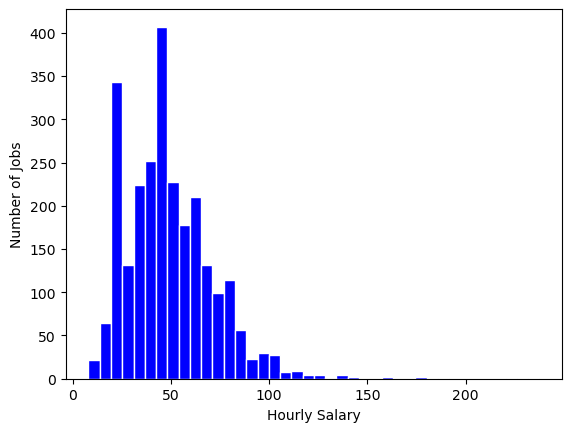

In [19]:
df_ds = df[df['job_title_short'] == 'Data Scientist'].copy()
df_ds = df_ds.dropna(subset='salary_hour_avg')
df_ds['salary_hour_avg'].plot(
    kind='hist', 
    bins=40, 
    color='blue',
    xlabel='Hourly Salary',
    ylabel='Number of Jobs',
    edgecolor='white'
)
plt.show()

🟨 Job Postings by Number of Skills (2.17.2) - Problem
Matplotlib Histograms
Problem Statement:

Create a histogram to show the distribution of job postings by the number of skills listed using the job_skills column:

- Create a new DataFrame called df_skills to filter out job postings with non-null job_skills.
- Customize the plot by setting the number of bins to 55, the bar color to 'magenta'
- Add a title 'Distribution of Job Postings by Number of Skills Listed'.
- Label the x-axis as 'Number of Skills' and the y-axis as 'Number of Job Postings'.

Hint:

Use the DataFrames plot() method and set the bins parameter to 55, the color parameter to 'magenta', and edgecolor to 'black'.

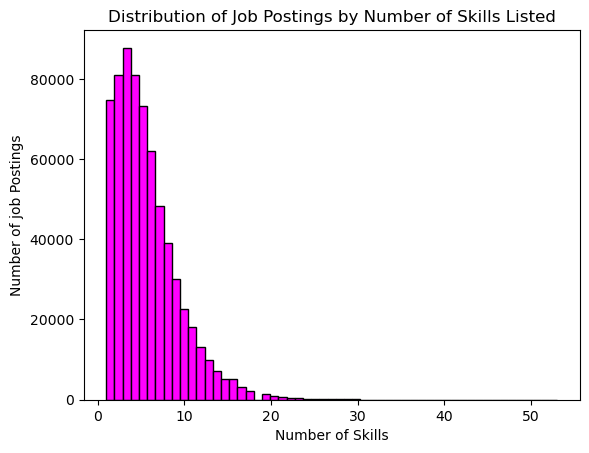

In [15]:
df_skills = df.dropna(subset='job_skills').copy()
df_skills['num_skill'] = df_skills['job_skills'].apply(len)
df_skills['num_skill'].plot(
    kind='hist',
    bins=55, 
    edgecolor='black',
    color='magenta'
)
plt.title('Distribution of Job Postings by Number of Skills Listed')
plt.xlabel('Number of Skills')
plt.ylabel('Number of job Postings')
plt.show()

🟥 Data Engineer Salaries (2.17.3) - Problem
Matplotlib Histograms
Problem Statement:

Create a histogram to show the distribution of average yearly salaries (salary_year_avg) for Data Engineer job postings:

- Create a new DataFrame called df_DE to filter out 'Data Engineer' jobs.
- Customize the plot by setting the number of bins to 50, the bar color to red
- Add annotations for the mean and median salaries, using plt.axvline(); for the parameters specify:
    - color: 'blue'/'green'
    - linestyle: 'dashed'
    - label: e.g., f'Mean: ${mean_salary:,.0f}'
- Label the x-axis as 'Yearly Salary' and the y-axis as 'Number of Jobs'.

Hint:

Use the DataFrames plot() method and set the bins parameter to 50 and the color parameter to 'red'. Use plt.axvline() to add annotations for the mean and median salaries.

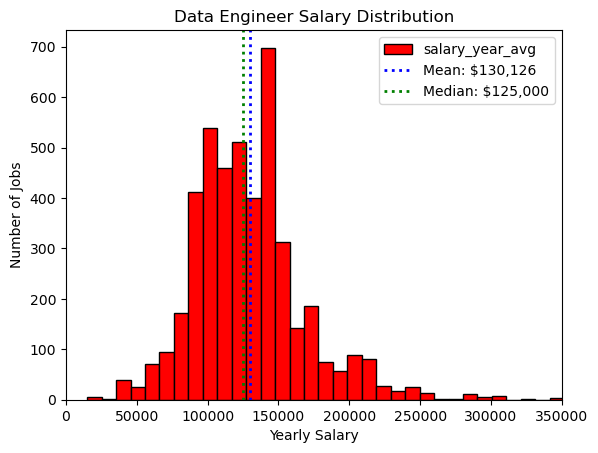

In [30]:
# filter df by job title
df_de = df[df['job_title_short']=='Data Engineer'].copy()

# calculate mean and median salaruy
avg_salary = df_de['salary_year_avg'].mean()
median_salary = df_de['salary_year_avg'].median()

# plot histogram
df_de['salary_year_avg'].plot(kind='hist', bins=50, color='red', edgecolor='black')
plt.title('Data Engineer Salary Distribution')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.xlim(0, 350_000)

# add annotations for mean and median salary
plt.axvline(x=avg_salary, color='blue', linestyle=':', linewidth=2, label=f'Mean: ${avg_salary:,.0f}')
plt.axvline(x=median_salary, color='green', linestyle=':', linewidth=2, label=f'Median: ${median_salary:,.0f}')

plt.legend()
plt.show()